In [1]:
# Draw all defined elements, with color and fill

In [2]:
import schemdraw
from schemdraw import elements as elm
#schemdraw.use('svg')

In [3]:
def drawElements(elm_list, n=5, dx=1, dy=2, ofst=.8, fname=None, **kwargs):
    x, y = 0, 0
    d = schemdraw.Drawing(fontsize=12)
    for e in elm_list:
        element = getattr(elm, e)
        A = d.add(element, xy=[(d.unit+1)*x+1,y], toplabel=e, **kwargs)
        x = x + dx
        if x >= n:
            x=0
            y=y-dy
    return d

def listmod(modname):
    module = getattr(elm, modname)
    elist = []
    for ename in dir(module):
        e = getattr(module, ename)
        if hasattr(e, '_buildparams') and ename not in ['Element', 'Element2Term', 'ElementDrawing']:
            elist.append(ename)
    return elist

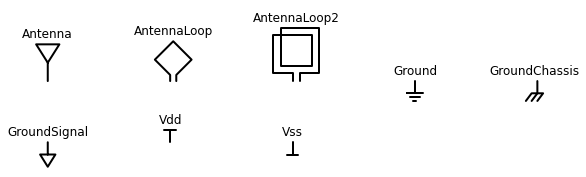

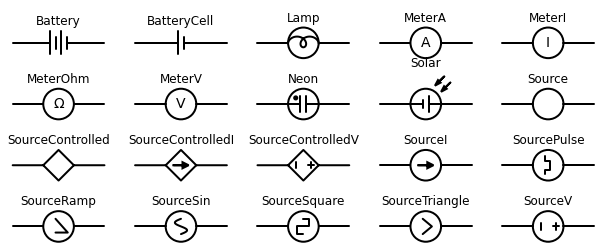

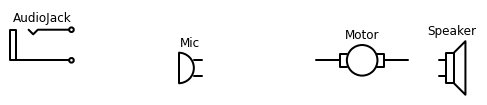

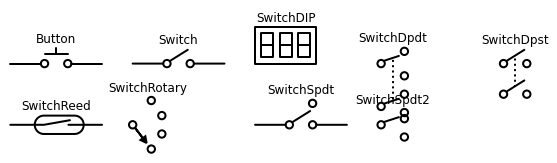

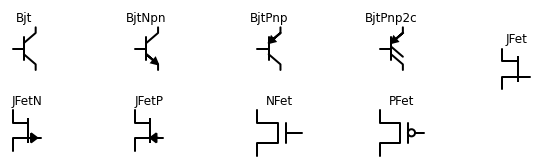

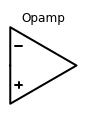

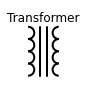

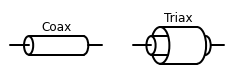

In [4]:
for mod in ['oneterm', 'sources', 'misc', 'switches',
            'transistors', 'opamp', 'xform', 'cables']:
    display(drawElements(listmod(mod), d='right'))

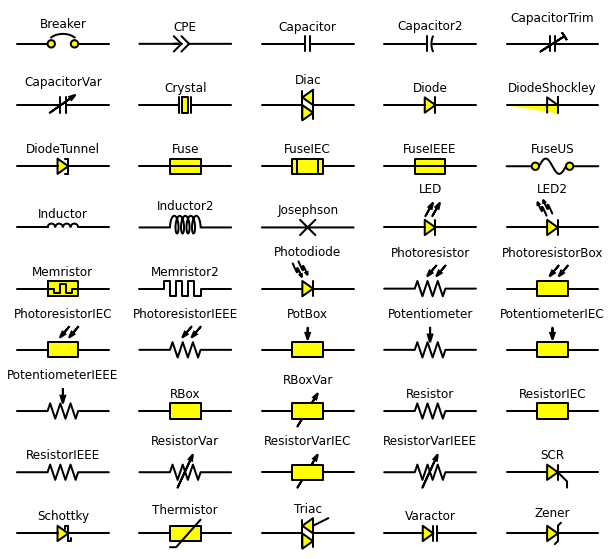

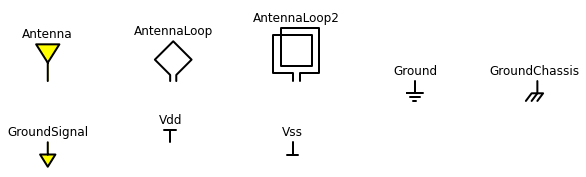

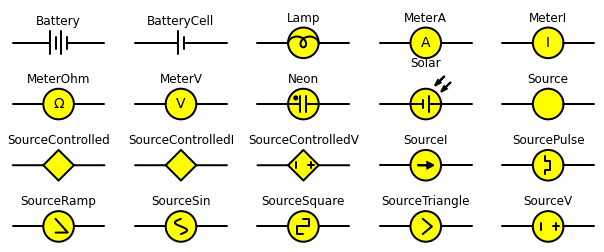

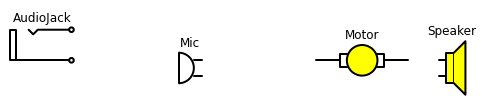

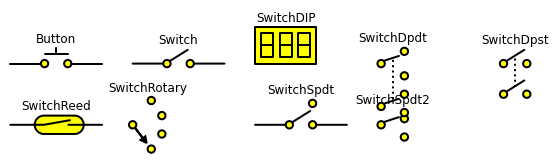

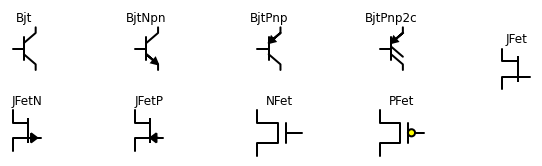

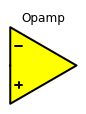

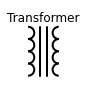

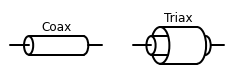

In [5]:
for mod in ['twoterm', 'oneterm', 'sources', 'misc', 'switches',
            'transistors', 'opamp', 'xform', 'cables']:
    display(drawElements(listmod(mod), d='right', fill='yellow'))

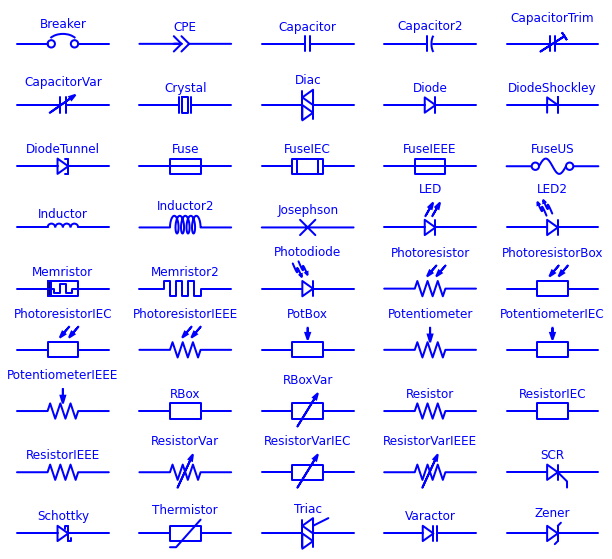

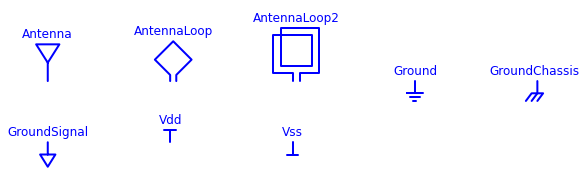

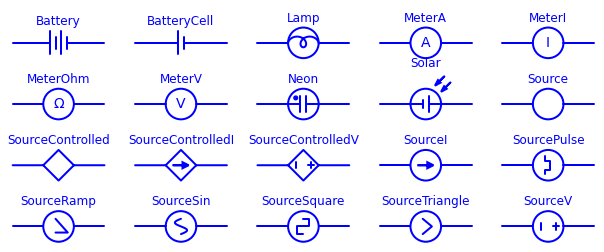

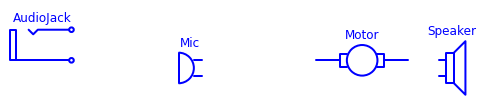

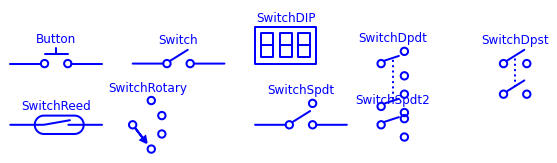

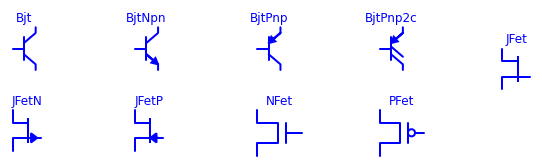

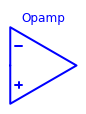

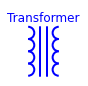

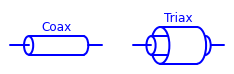

In [6]:
for mod in ['twoterm', 'oneterm', 'sources', 'misc', 'switches',
            'transistors', 'opamp', 'xform', 'cables']:
    display(drawElements(listmod(mod), d='right', color='blue'))

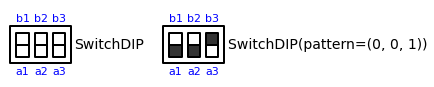

In [7]:
    d = schemdraw.Drawing()
    d += (elm.SwitchDIP().label('SwitchDIP', 'right')
         .label('a1', color='blue', loc='a1', valign='top', fontsize=11)
         .label('a2', color='blue', loc='a2', valign='top', fontsize=11)
         .label('a3', color='blue', loc='a3', valign='top', fontsize=11)
         .label('b1', color='blue', loc='b1', valign='bottom', fontsize=11)
         .label('b2', color='blue', loc='b2', valign='bottom', fontsize=11)
         .label('b3', color='blue', loc='b3', valign='bottom', fontsize=11))
    d += (elm.SwitchDIP(pattern=(0, 0, 1)).label('SwitchDIP(pattern=(0, 0, 1))', 'right')
         .label('a1', color='blue', loc='a1', valign='top', fontsize=11)
         .label('a2', color='blue', loc='a2', valign='top', fontsize=11)
         .label('a3', color='blue', loc='a3', valign='top', fontsize=11)
         .label('b1', color='blue', loc='b1', valign='bottom', fontsize=11)
         .label('b2', color='blue', loc='b2', valign='bottom', fontsize=11)
         .label('b3', color='blue', loc='b3', valign='bottom', fontsize=11).at((5, 0)))
    d.draw()


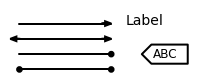

In [8]:
d = schemdraw.Drawing()
d += elm.Arrow()
d += elm.Arrow(double=True).at((0, -.5))
d += elm.LineDot().at((0, -1))
d += elm.LineDot(double=True).at((0, -1.5))
d += elm.Label(label='Label').at((4, 0))
d += elm.Tag().at((4, -1)).label('ABC')
d.draw()

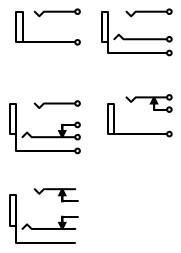

In [9]:
d = schemdraw.Drawing()
d += elm.AudioJack()
d += elm.AudioJack(ring=True).at((3, 0))
d += elm.AudioJack(ringswitch=True, ring=True).at((0, -3))
d += elm.AudioJack(switch=True).at((3, -3))
d += elm.AudioJack(ring=True, switch=True, ringswitch=True, dots=False).at((0, -6))
d.draw()

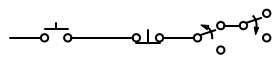

In [10]:
d = schemdraw.Drawing()
d += elm.Button()
d += elm.Button(nc=True)
d += elm.SwitchSpdt2(action='open')
d += elm.Line().length(.5)
d += elm.SwitchSpdt2(action='close')
d.draw()

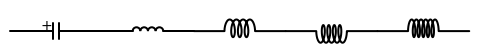

In [11]:
d = schemdraw.Drawing()
d += elm.Capacitor(polar=True).at((0, -1))
d += elm.Inductor()
d += elm.Inductor2(loops=3)
d += elm.Inductor2(loops=4).flip()
d += elm.Inductor2(loops=5).reverse()
d.draw()

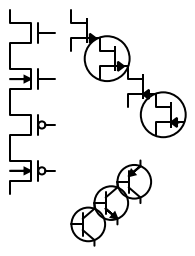

In [12]:
d = schemdraw.Drawing()
d += elm.NFet()
d += elm.NFet(bulk=True)
d += elm.PFet()
d += elm.PFet(bulk=True)
d.here = (2, 0)
d += elm.JFetN()
d += elm.JFetN(circle=True)
d += elm.JFetP()
d += elm.JFetP(circle=True)
d.here = (2, -7)
d += elm.Bjt(circle=True)
d += elm.BjtNpn(circle=True)
d += elm.BjtPnp(circle=True)
d.draw()

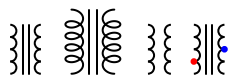

In [13]:
d = schemdraw.Drawing()
d += elm.Transformer()
d += elm.Transformer(loop=True).at((2, 0))
d += elm.Transformer(core=False).at((4.5, 0))
d += (X:=elm.Transformer(ltaps={'A':3}, rtaps={'B':2}).at((6, 0)))
d += elm.Dot().color('red').at(X.A)
d += elm.Dot().color('blue').at(X.B)
d 

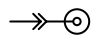

In [14]:
d = schemdraw.Drawing()
d += elm.Plug()
d += elm.Jack()
d += elm.CoaxConnect()
d.draw()

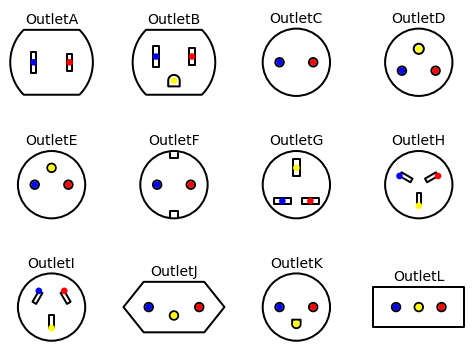

In [15]:
outlets = [elm.OutletA, elm.OutletB, elm.OutletC, elm.OutletD, elm.OutletE, elm.OutletF,
           elm.OutletG, elm.OutletH, elm.OutletI, elm.OutletJ, elm.OutletK, elm.OutletL]
d = schemdraw.Drawing()
for i, outlet in enumerate(outlets):
    K = outlet().label(outlet.__name__, loc='top')
    d.here = (i % 4) * 4, (i//4) * -4
    d += K

    d += elm.Dot().at(K.hot).color('red')
    d += elm.Dot().at(K.neutral).color('blue')
    if 'ground' in K.anchors:
        d += elm.Dot().at(K.ground).color('yellow')
d.draw()

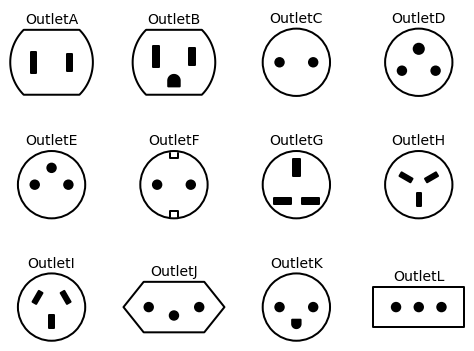

In [16]:
# Plug=True should fill
d = schemdraw.Drawing()
for i, outlet in enumerate(outlets):
    K = outlet(plug=True).label(outlet.__name__, loc='top')
    d.here = (i % 4) * 4, (i//4) * -4
    d += K
d.draw()